In [ ]:
from google.colab import files


uploaded = files.upload()


Saving car_data.csv to car_data.csv


STATES Found:  ['Kerala' 'Rajasthan' 'Maharashtra' 'UP East' 'Karnataka' nan
 'Madhya Pradesh' 'Kolkata' 'Bihar' 'Gujarat' 'UP West' 'Orissa'
 'Tamil Nadu' 'Delhi' 'Assam' 'Andhra Pradesh' 'Haryana' 'Punjab'
 'North East' 'Mumbai' 'Chennai' 'Himachal Pradesh' 'Jammu & Kashmir'
 'West Bengal']
OPERATORS Found:  ['IDEA' 'JIO' 'AIRTEL' 'VODAFONE' 'CELLONE']


Comparing data forJIO
Older: Kerala -- Download: 26129.27 Upload: 5193.46
Newer: Kerala -- Download: 18917.46 Upload: 4290.13
Older: Rajasthan -- Download: 27784.86 Upload: 5736.18
Newer: Rajasthan -- Download: 13973.66 Upload: 4721.17
Older: Maharashtra -- Download: 20707.88 Upload: 4130.46
Newer: Maharashtra -- Download: 26285.47 Upload: 5848.77
Older: UP East -- Download: 22451.35 Upload: 5727.95
Newer: UP East -- Download: 24368.81 Upload: 6101.20
Older: Karnataka -- Download: 16950.36 Upload: 4720.68
Newer: Karnataka -- Download: 33521.31 Upload: 5871.38
Older: Madhya Pradesh -- Download: 23594.85 Upload: 4802.89
Newer: Madhya P

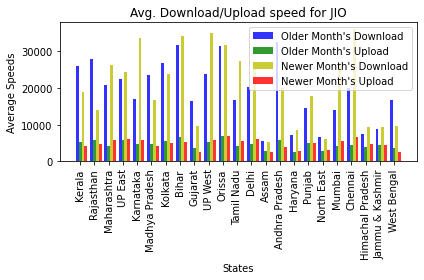

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# older month
DATASET_FILENAME = 'https://myspeed.trai.gov.in/download/sept18_publish.csv'

# newer month
DATASET_FILENAME2 = 'https://myspeed.trai.gov.in/download/oct18_publish.csv'

CONST_OPERATOR = 'JIO'
CONST_STATE = 'Delhi'
CONST_TECHNOLOGY = '4G'

# read file with Pandas and store as Dataframe
df = pd.read_csv(DATASET_FILENAME)
df2 = pd.read_csv(DATASET_FILENAME2)

# assign column names
df.columns = ['Service Provider', 'Technology', 'Test Type',
				'Data Speed', 'Signal Strength', 'State']
df2.columns = ['Service Provider', 'Technology', 'Test Type',
					'Data Speed', 'Signal Strength', 'State']

# find and display the unique states
states = df['State'].unique()
print('STATES Found: ', states)

# find and display the unique operators
operators = df['Service Provider'].unique()
print('OPERATORS Found: ', operators)

# define lists
final_download_speeds = []
final_upload_speeds = []

final_download_speeds_second =[]
final_upload_speeds_second = []
	
final_states = []
final_operators = []

# assign column names to the data
df.columns = ['Service Provider', 'Technology', 'Test Type',
				'Data Speed', 'Signal Strength', 'State']
df2.columns = ['Service Provider', 'Technology', 'Test Type',
					'Data Speed', 'Signal Strength', 'State']


print('\n\nComparing data for' + str(CONST_OPERATOR))
filtered = df[(df['Service Provider'] == CONST_OPERATOR)
			& (df['Technology'] == CONST_TECHNOLOGY)]

filtered2 = df2[(df2['Service Provider'] == CONST_OPERATOR)
				& (df2['Technology'] == CONST_TECHNOLOGY)]

for state in states:
	base = filtered[filtered['State'] == state]

	# calculate mean of download speeds
	avg_down = base[base['Test Type'] ==
			'download']['Data Speed'].mean()

	# calculate mean of upload speeds
	avg_up = base[base['Test Type'] ==
				'upload']['Data Speed'].mean()

	base2 = filtered2[filtered2['State'] == state]

	# calculate mean of download speeds
	avg_down2 = base2[base2['Test Type'] ==
			'download']['Data Speed'].mean()

	# calculate mean of upload speeds
	avg_up2 = base2[base2['Test Type'] ==
				'upload']['Data Speed'].mean()


	# discard values if mean is not a number(nan)
	# and append only the needed speeds
	if (pd.isnull(avg_down) or pd.isnull(avg_up) or
		pd.isnull(avg_down2) or pd.isnull(avg_up2)):
		avg_down = 0
		avg_up = 0
		avg_down2 = 0
		avg_up2 = 0
	else:
		final_states.append(state)
		final_download_speeds.append(avg_down)
		final_upload_speeds.append(avg_up)
		final_download_speeds_second.append(avg_down2)
		final_upload_speeds_second.append(avg_up2)
		
		print('Older: ' + str(state) + ' -- Download: ' +
			str('%.2f' % avg_down) + ' Upload: ' +
			str('%.2f' % avg_up))

		print('Newer: ' + str(state) + ' -- Download: ' +
			str('%.2f' % avg_down2) + ' Upload: ' +
			str('%.2f' % avg_up2))

# plot bargraph
fig, ax = plt.subplots()
index = np.arange(len(final_states))
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, final_download_speeds,
				bar_width, alpha=opacity, color='b',
					label='Older Month\'s Download')

rects2 = plt.bar(index + bar_width, final_upload_speeds,
					bar_width, alpha=opacity, color='g',
						label='Older Month\'s Upload')

rects3 = plt.bar(index + 2 * bar_width, final_download_speeds_second,
								bar_width, alpha=opacity, color='y',
									label='Newer Month\'s Download')

rects4 = plt.bar(index + 3 * bar_width, final_upload_speeds_second,
							bar_width, alpha=opacity, color='r',
									label='Newer Month\'s Upload')

plt.xlabel('States')
plt.ylabel('Average Speeds')
plt.title('Avg. Download/Upload speed for '
					+ str(CONST_OPERATOR))

plt.xticks(index + bar_width, final_states, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()
